In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
url="https://drive.google.com/file/d/1VD06DjyGegNAWdJxFqKW-BtNsSbZsbez/view?usp=drive_link"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
ad = pd.read_csv(url)

In [3]:
X = ad.drop('sales' , axis=1)

In [4]:
y = ad['sales']

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error    
from sklearn.model_selection import train_test_split

<h2><mark>Linear Regression</mark></h2>

In [6]:
model = LinearRegression()

<h2><mark>Polynomial Regression</mark></h2>

In [7]:
polynomial_converter = PolynomialFeatures(degree=3 , include_bias=False)

<h3>Feature Engineering Converting data to polynomial feature</h3>

In [8]:
X = polynomial_converter.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [10]:
model.fit(X_train, y_train)

LinearRegression()

In [17]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
prediction_polynomial = model.predict(X_test)

<h2><mark>Comparing Linear & Polynomial Regression</mark></h2>

In [24]:
residual_polynomial = y_test - prediction_polynomial

<Axes: xlabel='sales', ylabel='Count'>

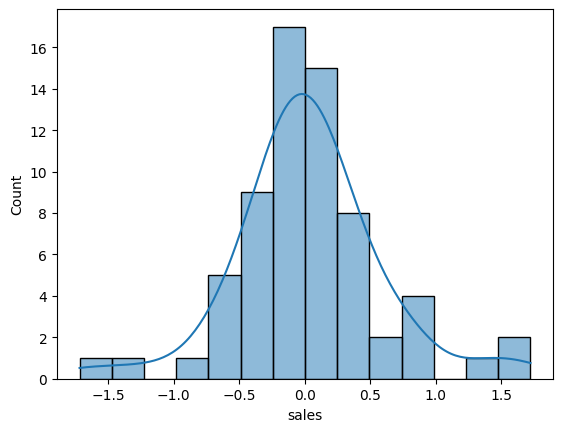

In [25]:
sns.histplot(data=residual_polynomial , kde=True)

In [26]:
mae = mean_absolute_error(y_test,prediction_polynomial)
mse = mean_squared_error(y_test,prediction_polynomial)
rmse = np.sqrt(mse)
print("Mean Absolute Error:" , mae ," Root Mean Square Error:",rmse)

Mean Absolute Error: 0.3932185286563811  Root Mean Square Error: 0.5577254823367543


In [15]:
model.coef_

array([ 8.48640295e-02,  3.17595923e-02,  1.48708109e-02, -4.07135519e-04,
        1.55556041e-03, -3.13375556e-04, -1.81729512e-03,  8.96067355e-04,
        1.46295664e-04,  7.01282872e-07, -1.80424525e-06,  1.02768549e-06,
        2.80940516e-06, -2.15105776e-06,  5.10402951e-08,  2.22063326e-05,
       -7.79222370e-06, -3.51382588e-06, -1.22340332e-06])